In [15]:
import importlib
import spheres_generator as spg 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

importlib.reload(spg)



<module 'spheres_generator' from '/home/hj/lsnc/src/test/spheres_data/spheres_generator.py'>

### Generate and save raw filw

In [12]:
# create the raw spheres dataset
raw, labels = spg.create_sphere_dataset(n=3000)
# save the raw dataset in .data
np.save('./data/raw.npy', raw)
np.save('./data/label.npy', labels)

In [51]:
def create_circle(x_coor, y_coor, n=500, rad=1.5):
	alpha = 2 * math.pi * np.random.rand(n)
	r = np.sqrt(np.random.rand(n)) * rad
	# u = np.random.rand(n) * 2
	# u[u > 1] = 2 - u[u > 1]
	# r = rad * u
	x = r * np.cos(alpha) + x_coor
	y = r * np.sin(alpha) + y_coor

	## concat x, y as a 2d array
	circle = np.array([x, y]).T

	return circle

def create_circles(angles = [60, 60] * 3, circle_n=500, rad=1.5, circle_rad=4):
	curr_angle = 0
	circles = None
	labels = None
	for i, angle in enumerate(angles):
		x = circle_rad * math.cos(math.radians(curr_angle))
		y = circle_rad * math.sin(math.radians(curr_angle))
		circle = create_circle(x, y, n=circle_n, rad=rad)
		if circles is None:
			circles = circle
			labels = np.array([i] * circle_n)
		else:
			circles = np.concatenate((circles, circle), axis=0)
			labels = np.concatenate((labels, np.array([i] * circle_n)), axis=0)
		curr_angle += angle
	
	return circles, labels
		


### Generate and save emb file - for experiment 1 (overlapping circles)

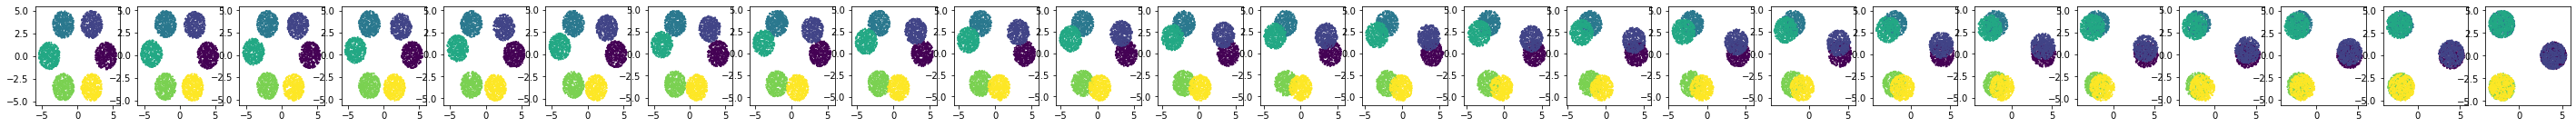

In [68]:
fig, axs = plt.subplots(1, 25, figsize=(50, 2))
for i, circle_angle in enumerate(np.linspace(60, 0, 25)):
	circles, labels = create_circles([circle_angle, 120 - circle_angle] * 3, 500, 1.5, 4)
	axs[i].scatter(circles[:, 0], circles[:, 1], s=1, c=labels)
	np.save(f'./data/overlapping/circle_{i}.npy', circles)

plt.show()


### Generate and save emb file - for experiment 2 (splitting circles)

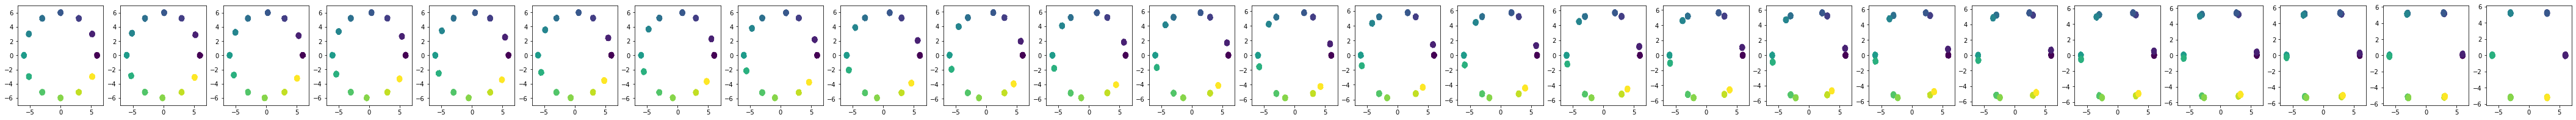

In [78]:
fig, axs = plt.subplots(1, 25, figsize=(75, 3))
for i, circle_angle in enumerate(np.linspace(30, 0, 25)):
	circles, labels = create_circles([circle_angle, 60 - circle_angle] * 6, 250, 0.4, 6)
	axs[i].scatter(circles[:, 0], circles[:, 1], s=1, c=labels)
	np.save(f'./data/splitting/circle_{i}.npy', circles)

plt.show()